In [4]:
import pandas as pd
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()
def weighted(x, w="weights"):
    return pd.Series(np.average(x, weights=x.index.get_level_values(w), axis=0),index= x.columns)


In [5]:
NUM_SEED = 5

In [16]:
counts_list=[]
for i in range(NUM_SEED):
    tree = ET.parse('Sim{}/laneData_25MIV_sim{}.xml'.format(i+1,i+1))
    root = tree.getroot()

    for interval in root:
        for lane in interval.findall(".//lane"):
            counts_dict = {}
            counts_dict['int'] = interval.get('begin')
            counts_dict['mode'] = interval.get('id')
            counts_dict['lane_id'] = lane.get('id')
            counts_dict['departed'] = lane.get('departed')
            counts_dict['entered'] = lane.get('entered')
            counts_dict['laneDensity_veh'] = lane.get('laneDensity', 0)
            counts_dict['delay'] = lane.get('timeLoss',0)
            counts_dict['sim'] = 'sim{}'.format(i+1)
            counts_list.append(counts_dict)
data = pd.DataFrame(counts_list)
data

,int,mode,lane_id,departed,entered,laneDensity_veh,delay,sim
0,21600.00,PKW,-1007827874#1_0,0,0,0,0,sim1
1,21600.00,PKW,-1007827874#1_1,0,0,0,0,sim1
2,21600.00,PKW,-1011249147#0_0,0,0,0,0,sim1
3,21600.00,PKW,-1011249147#0_1,0,0,0,0,sim1
4,21600.00,PKW,-1037128391#1_0,0,0,0,0,sim1
...,...,...,...,...,...,...,...,...
1363195,39300.00,BIKE,E95_0,0,16,12.10,18.98,sim5
1363196,39300.00,BIKE,E96_0,0,0,0,0,sim5
1363197,39300.00,BIKE,E97_0,0,0,0,0,sim5
1363198,39300.00,BIKE,E98_0,0,0,0,0,sim5


In [17]:
#add attributes
lanes = pd.read_csv('../Network/list_of_lanes.csv', names=['lane_id', 'length','PKW_allowed'], header = 0)
lanes

,lane_id,length,PKW_allowed
0,-10414497#1_1,85.90,yes
1,-10414497#2_1,43.24,yes
2,-1042405420#1_1,263.72,yes
3,-1056324193#1_0,71.16,yes
4,-10594635#0_0,73.34,yes
...,...,...,...
2139,E24_0,90.18,no
2140,E3_0,40.58,no
2141,E5_0,26.37,no
2142,E6_0,108.90,no


In [18]:
df = data.merge(lanes, how='outer', on='lane_id')
df

,int,mode,lane_id,departed,entered,laneDensity_veh,delay,sim,length,PKW_allowed
0,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,109.68,yes
1,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,50.51,yes
2,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,24.80,yes
3,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,508.30,yes
4,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,87.83,yes
...,...,...,...,...,...,...,...,...,...,...
1363310,38700.00,BIKE,E9_0,0,0,0,0,sim5,89.60,no
1363311,39000.00,PKW,E9_0,0,0,0,0,sim5,89.60,no
1363312,39000.00,BIKE,E9_0,0,0,0,0,sim5,89.60,no
1363313,39300.00,PKW,E9_0,0,0,0,0,sim5,89.60,no


In [19]:
#change types to float
df['departed']=df['departed'].astype(float)
df['entered']=df['entered'].astype(float)
df['delay']=df['delay'].astype(float)
df['laneDensity_veh']=df['laneDensity_veh'].astype(float)
df['length']=df['length'].astype(float)
#add flows
df['flow_veh'] = (df['departed']+df['entered'])*3600/300
df['factor_person'] = 1
for i in range(len(df)):
    if df.iloc[i,1] == 'PKW':
        df.iloc[i,11] = 1.43
df['flow_person'] = df['factor_person']*(df['departed']+df['entered'])*3600/300
df['lane_density_person'] = df['laneDensity_veh']*df['factor_person']
df

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\1560906013.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.43' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[i,11] = 1.43


,int,mode,lane_id,departed,entered,laneDensity_veh,delay,sim,length,PKW_allowed,flow_veh,factor_person,flow_person,lane_density_person
0,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,109.68,yes,NaN,1.00,NaN,NaN
1,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,50.51,yes,NaN,1.00,NaN,NaN
2,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,24.80,yes,NaN,1.00,NaN,NaN
3,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,508.30,yes,NaN,1.00,NaN,NaN
4,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,87.83,yes,NaN,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363310,38700.00,BIKE,E9_0,0.0,0.0,0.0,0.0,sim5,89.60,no,0.0,1.00,0.0,0.0
1363311,39000.00,PKW,E9_0,0.0,0.0,0.0,0.0,sim5,89.60,no,0.0,1.43,0.0,0.0
1363312,39000.00,BIKE,E9_0,0.0,0.0,0.0,0.0,sim5,89.60,no,0.0,1.00,0.0,0.0
1363313,39300.00,PKW,E9_0,0.0,0.0,0.0,0.0,sim5,89.60,no,0.0,1.43,0.0,0.0


In [20]:
#divide into districts and cars
df_full = df
df_full_cars = df_full[df_full['mode']=='PKW']
df_full_cars = df_full_cars[df_full_cars['PKW_allowed']=='yes']
df_full_bikes = df_full[df_full['mode']=='BIKE']

#weighted sums for flow/density per interval, all vehicles
df_full_veh = pd.DataFrame(df_full.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
df_full_veh = df_full_veh.merge(pd.DataFrame(df_full.groupby(['int','sim']).apply(w_avg, 'flow_veh', 'length'),columns=['veh_flow']),on=['int','sim'])
#df_full_veh.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_allveh.csv')

df_full_per = pd.DataFrame(df_full.groupby(['int','sim']).apply(w_avg, 'lane_density_person', 'length'), columns=['lane_density_person'])
df_full_per = df_full_per.merge(pd.DataFrame(df_full.groupby(['int','sim']).apply(w_avg, 'flow_person', 'length'),columns=['person_flow']),on=['int','sim'])
#df_full_per.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_allper.csv')

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2589935418.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh = pd.DataFrame(df_full.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2589935418.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh = df_full_veh.merge(pd.DataFrame(df_full

In [21]:
#weighted sums for flow/density per interval, cars
df_full_veh_cars = pd.DataFrame(df_full_cars.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
df_full_veh_cars = df_full_veh_cars.merge(pd.DataFrame(df_full_cars.groupby(['int','sim']).apply(w_avg, 'flow_veh', 'length'),columns=['veh_flow']),on=['int','sim'])
#df_full_veh_cars.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_cars_veh.csv')

df_full_per_cars = pd.DataFrame(df_full_cars.groupby(['int','sim']).apply(w_avg, 'lane_density_person', 'length'), columns=['lane_density_person'])
df_full_per_cars = df_full_per_cars.merge(pd.DataFrame(df_full_cars.groupby(['int','sim']).apply(w_avg, 'flow_person', 'length'),columns=['person_flow']),on=['int','sim'])
#df_full_per_cars.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_cars_per.csv')

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2351712924.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh_cars = pd.DataFrame(df_full_cars.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2351712924.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh_cars = df_full_veh_cars.merge(

In [22]:
#weighted sums for flow/density per interval, bikes
df_full_veh_bikes = pd.DataFrame(df_full_bikes.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
df_full_veh_bikes = df_full_veh_bikes.merge(pd.DataFrame(df_full_bikes.groupby(['int','sim']).apply(w_avg, 'flow_veh', 'length'),columns=['veh_flow']),on=['int','sim'])
#df_full_veh_bikes.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_bikes_veh.csv')

df_full_per_bikes = pd.DataFrame(df_full_bikes.groupby(['int','sim']).apply(w_avg, 'lane_density_person', 'length'), columns=['lane_density_person'])
df_full_per_bikes = df_full_per_bikes.merge(pd.DataFrame(df_full_bikes.groupby(['int','sim']).apply(w_avg, 'flow_person', 'length'),columns=['person_flow']),on=['int','sim'])
#df_full_per_bikes.to_csv('RESULTS/NFD/25MIV_fixed_m_whole_nfd_bikes_per.csv')

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\683812521.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh_bikes = pd.DataFrame(df_full_bikes.groupby(['int','sim']).apply(w_avg, 'laneDensity_veh', 'length'), columns=['laneDensity_veh'])
C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\683812521.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_full_veh_bikes = df_full_veh_bikes.merg

## Plots

In [23]:
#function to show maximum values in plots

def annot_max_flow(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "max.flow={:.1f} veh/(h*lane)".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=90,angleB=0")
    #kw = dict(xycoords='data',textcoords="axes fraction",
              #arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    kw = dict(xycoords='data',textcoords="axes fraction", bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.97,0.15), **kw, fontsize='large')
def annot_max_den(x,y, ax=None):
    xmax = x.max()
    ymax = y[np.argmax(x)]
    text= "max.density={:.1f} veh/(km*lane)".format(xmax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=-90,angleB=0")
    #kw = dict(xycoords='data',textcoords="axes fraction",
              #arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    kw = dict(xycoords='data',textcoords="axes fraction", bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.97,0.08), **kw, fontsize='large')


def annot_max_flow_p(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "max.flow={:.1f} per/(h*lane)".format(ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=90,angleB=0")
    #kw = dict(xycoords='data',textcoords="axes fraction",
              #arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    kw = dict(xycoords='data',textcoords="axes fraction", bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.97,0.15), **kw, fontsize='large')
def annot_max_den_p(x,y, ax=None):
    xmax = x.max()
    ymax = y[np.argmax(x)]
    text= "max.density={:.1f} per/(km*lane)".format(xmax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=-90,angleB=0")
    #kw = dict(xycoords='data',textcoords="axes fraction",
              #arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    kw = dict(xycoords='data',textcoords="axes fraction", bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.97,0.08), **kw, fontsize='large')

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2742204511.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xmax = x[np.argmax(y)]
C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2742204511.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ymax = y[np.argmax(x)]


Text(0.5, 1.02, '25%Cars/75%Bikes - Fixed Cycle - Morning - Car/Bicycle NFDs')

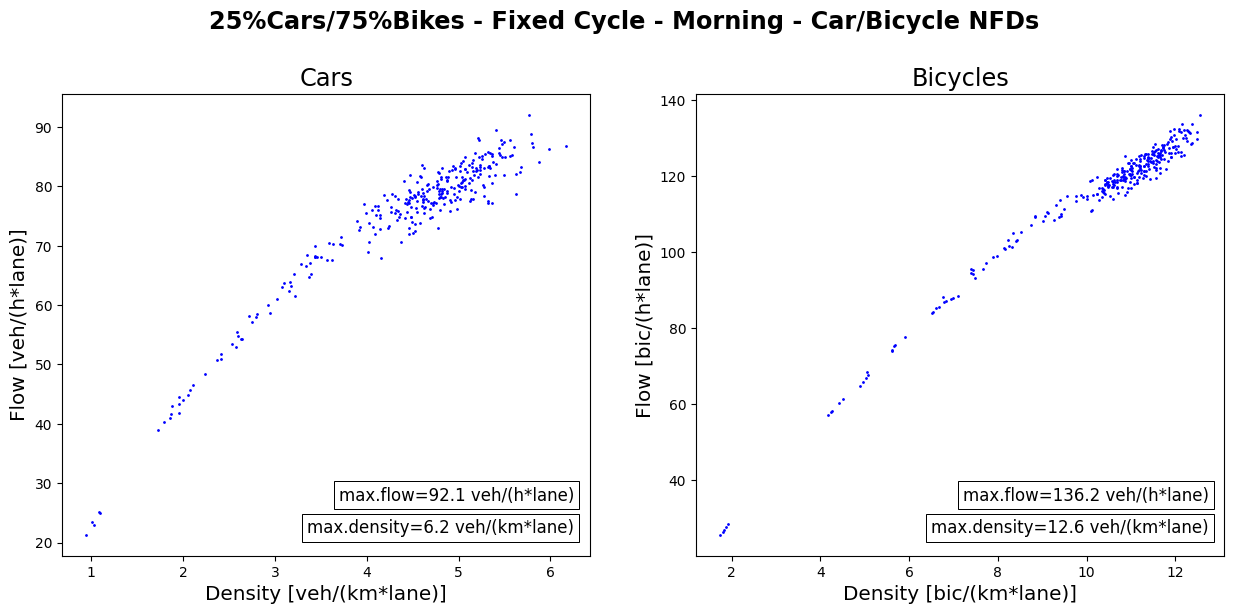

In [26]:
# NFD whole network, cars and bicycles

fig, axs = plt.subplots(1, 2,sharex=False,sharey=False, figsize=(15,6))
# -------------------------------------------------------------------------
axs[0].scatter(df_full_veh_cars['laneDensity_veh'], df_full_veh_cars['veh_flow'], c='b', s = 1)

axs[0].set_xlabel('Density [veh/(km*lane)]',fontsize="x-large")
axs[0].set_ylabel('Flow [veh/(h*lane)]',fontsize="x-large")
axs[0].set_title('Cars',fontsize="xx-large")

annot_max_flow(df_full_veh_cars['laneDensity_veh'], df_full_veh_cars['veh_flow'],axs[0])
annot_max_den(df_full_veh_cars['laneDensity_veh'], df_full_veh_cars['veh_flow'],axs[0])

#axs[0].set_xlim([0, 15])
#axs[0].set_ylim([0, 120])
# -------------------------------------------------------------------------
axs[1].scatter(df_full_veh_bikes['laneDensity_veh'], df_full_veh_bikes['veh_flow'], c='b', s = 1)

axs[1].set_xlabel('Density [bic/(km*lane)]',fontsize="x-large")
axs[1].set_ylabel('Flow [bic/(h*lane)]',fontsize="x-large")
axs[1].set_title('Bicycles',fontsize="xx-large")

annot_max_flow(df_full_veh_bikes['laneDensity_veh'], df_full_veh_bikes['veh_flow'],axs[1])
annot_max_den(df_full_veh_bikes['laneDensity_veh'], df_full_veh_bikes['veh_flow'],axs[1])

#axs[1].set_xlim([0, 15])
#axs[1].set_ylim([0, 120])
#-------------------------------------------------
fig.suptitle('25%Cars/75%Bikes - Fixed Cycle - Morning - Car/Bicycle NFDs', fontsize='xx-large', fontweight='bold', y=1.02)

#plt.savefig('RESULTS/NFD/25MIV_fixed_m_vehnfd.svg',bbox_inches='tight')
#plt.savefig('RESULTS/NFD/25MIV_fixed_m_vehnfd.pdf',bbox_inches='tight')

C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2742204511.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xmax = x[np.argmax(y)]
C:\Users\yingni\AppData\Local\Temp\ipykernel_13356\2742204511.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ymax = y[np.argmax(x)]


Text(0.5, 1.02, '25%Cars/75%Bikes - Fixed Cycle - Morning - Person NFD')

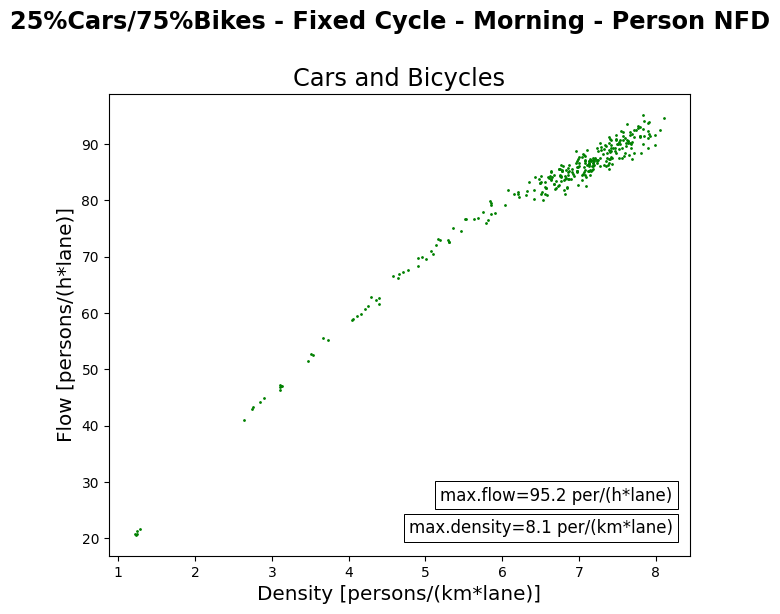

In [29]:
# NFD whole network, persons

fig, axs = plt.subplots(1, 1,sharex=False,sharey=False, figsize=(7.5,6))
# -------------------------------------------------------------------------

axs.scatter(df_full_per['lane_density_person'], df_full_per['person_flow'], c='g', s = 1)

axs.set_xlabel('Density [persons/(km*lane)]',fontsize="x-large")
axs.set_ylabel('Flow [persons/(h*lane)]',fontsize="x-large")
axs.set_title('Cars and Bicycles',fontsize="xx-large")

#axs.set_xlim([0, 18])
#axs.set_ylim([0, 120])
annot_max_flow_p(df_full_per['lane_density_person'], df_full_per['person_flow'],axs)
annot_max_den_p(df_full_per['lane_density_person'], df_full_per['person_flow'],axs)

#-------------------------------------------------
fig.suptitle('25%Cars/75%Bikes - Fixed Cycle - Morning - Person NFD', fontsize='xx-large', fontweight='bold', y=1.02)

#plt.savefig('RESULTS/NFD/25MIV_fixed_m_pernfd.svg',bbox_inches='tight')
#plt.savefig('RESULTS/NFD/25MIV_fixed_m_pernfd.pdf',bbox_inches='tight')